# Messi's Pass Map
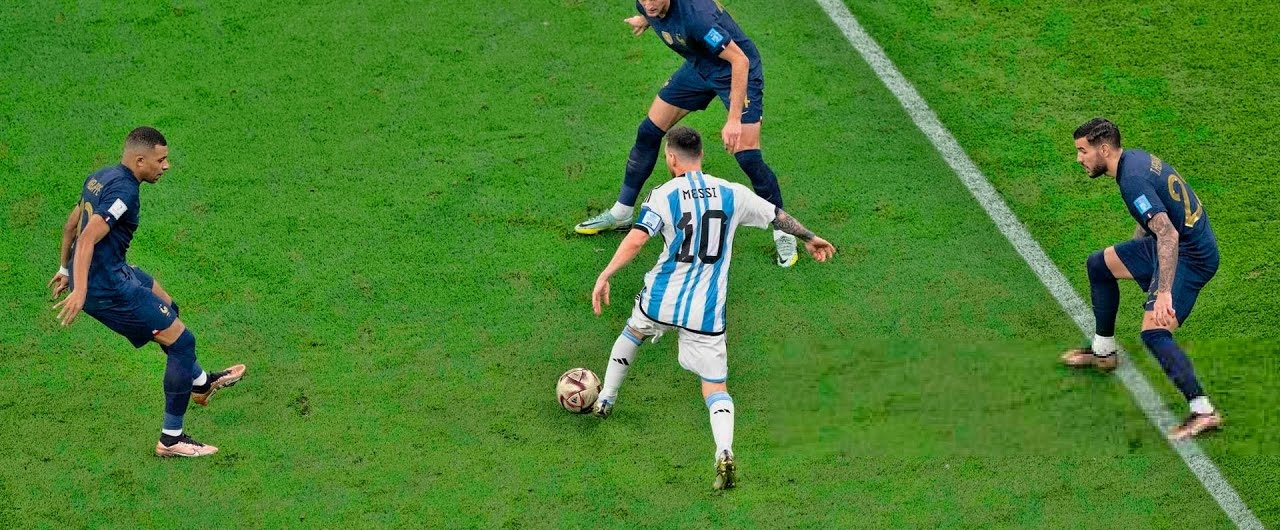
<font color = 'blue'>
Contents:
1. [Importing libraries](#1)
1. [Load and Check Data](#2)
1. [We choose the match to analyze](#3)
1. [Finding the Player we want to Analyze](#4)
1. [We get Messi's pass data](#5)
1. [We create the pass map](#6)

<a id = '1'> </a> </br>
# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsbombpy import sb

from mplsoccer import Pitch
from mplsoccer.quiver import arrows

C:\Users\suubc\AppData\Local\Temp\ipykernel_30084\87542687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<a id = '2'> </a> </br>
# Load and Check Data

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
65,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
66,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
67,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
68,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [3]:
sb.matches(competition_id=43, season_id=106).head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


<a id = '3'> </a> </br>
# We choose the match to analyze

In [4]:
MATCH_ID = 3869685

In [5]:
match_events_df = sb.events(match_id=MATCH_ID)

In [6]:
match_360_df = pd.read_json(f'C:/Users/suubc/statsbombpy/three-sixty/{MATCH_ID}.json')

In [7]:
match_events_df.head(3)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


In [8]:
match_360_df.head(3)

,event_uuid,visible_area,freeze_frame
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [9]:
match_360_df.head()

,event_uuid,visible_area,freeze_frame
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ..."


* ### By combining 360 data with events data, we make it more understandable and easier. 

In [10]:
df= pd.merge(left=match_events_df, right=match_360_df,  left_on='id', right_on='event_uuid', how='left')

In [11]:
df.head(5)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,France,771,00:00:00.000,Half Start,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

<a id = '4'> </a> </br>
# Finding the Player we want to Analyze
* ### We look for players with 'df.player'. We search for the player With 'df.player_id' in that row and get the player id
* ### df.player[36] and df.player_id[36]

In [13]:
df.player_id.unique()

array([   nan,  5487., 10481., 29201.,  7797., 20572.,  3090.,  5507.,
        6909.,  6704.,  3026.,  5485.,  4445., 27886.,  5503.,  2995.,
        3099.,  3604., 38718.,  3009.,  5477., 29560.,  8519., 22097.,
        2972., 19597., 24778.,  8217., 28263., 11990., 16308., 11456.,
       11135.,  5743.,  7161.])

In [14]:
df.player[36]

'Lionel Andrés Messi Cuccittini'

In [15]:
df.player_id[36]

5503.0

<a id = '5'> </a> </br>
# We get Messi's pass data

In [16]:
MESSI = 5503

df_messi_pass = df[(df['player_id'] == MESSI) & (df['type'] == 'Pass')].reset_index(drop=True)

In [17]:
# We can check id with df_messi_pass.player_id

In [18]:
df_messi_pass.head(3)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:16.985,Pass,True,1552304a-f3c0-42bf-b7ff-d7b0173d7488,"[85.5040380313735, 77.9451748902892, 58.862742...","[{'teammate': False, 'actor': False, 'keeper':..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:02:27.185,Pass,NaN,f9405131-3f16-47bc-ab94-082f20057f60,"[98.8387085779202, 79.2108986084354, 74.322964...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Argentina,779,00:03:52.966,Pass,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,"[53.4407029120278, 78.4795871059066, 38.950153...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [19]:
df_messi_pass.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [20]:
# x and y positions like this
df_messi_pass.location.head(3)

0    [76.6, 35.7]
1    [99.3, 57.3]
2    [67.9, 59.0]
Name: location, dtype: object

* ### Assign pass locations

In [21]:
df_messi_pass[['x_start','y_start']] = pd.DataFrame(df_messi_pass.location.tolist(), index=df_messi_pass.index)
df_messi_pass[['x_end','y_end']] = pd.DataFrame(df_messi_pass.pass_end_location.tolist(), index=df_messi_pass.index)

<a id = '6'> </a> </br>
# We create the pass map

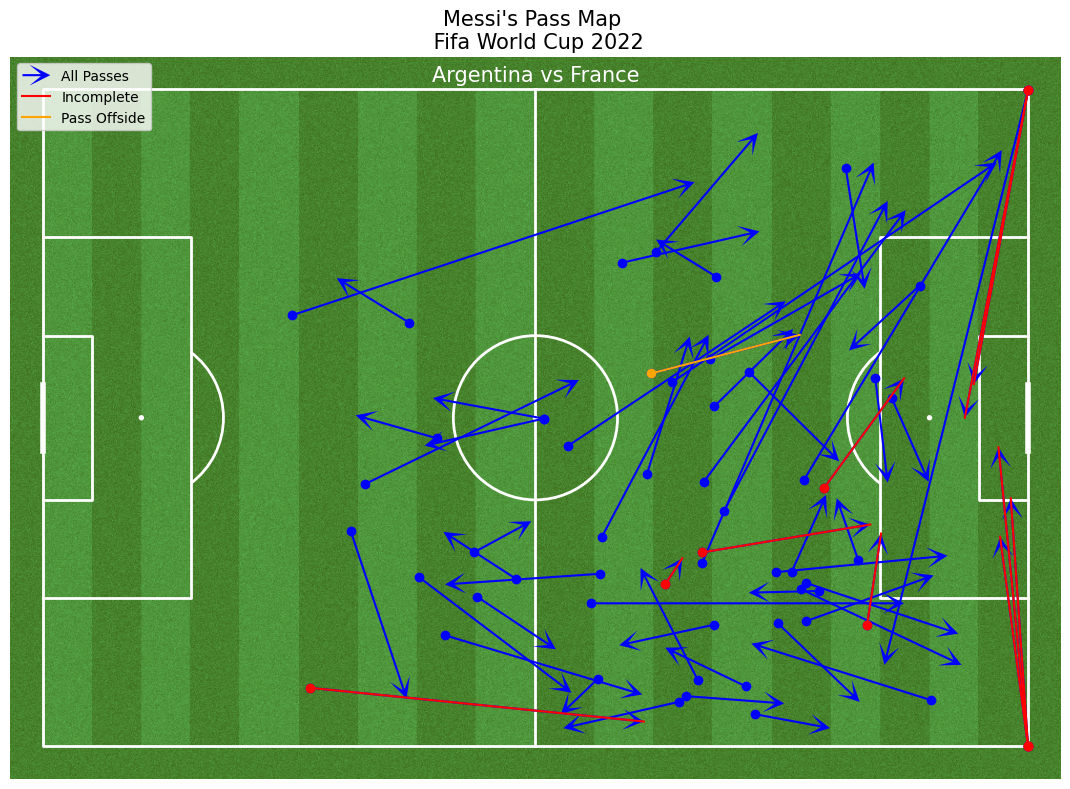

In [22]:
# pitch view
p = Pitch(pitch_type='statsbomb',pitch_color='grass', line_color='white',stripe_color='#c2d59d', stripe=True)
fig, ax = p.draw(figsize=(12,8))


# where messi starts to pass the ball
p.scatter(x=df_messi_pass['x_start'], y=df_messi_pass['y_start'], ax=ax, color='blue')


# p.lines(xstart=df_messi_pass['x_start'], ystart=df_messi_pass['y_start'],
# xend=df_messi_pass['x_end'], yend=df_messi_pass['y_end'], 
# ax=ax, comet=True,color='blue')


p.arrows(xstart=df_messi_pass['x_start'], ystart=df_messi_pass['y_start'],
             xend=df_messi_pass['x_end'], yend=df_messi_pass['y_end'], width=1.5,
             headwidth=10, headlength=10, color='blue', ax=ax,label='All Passes')


for x in range(len(df_messi_pass['x_start'])):
    if df_messi_pass['pass_outcome'][x] =='Incomplete':
        plt.plot((df_messi_pass['x_start'][x], df_messi_pass['x_end'][x]),(df_messi_pass['y_start'][x],df_messi_pass['y_end'][x]),
                 color='red', label='Incomplete')
        plt.scatter(df_messi_pass['x_start'][x],df_messi_pass['y_start'][x], color='red')
    if df_messi_pass['pass_outcome'][x] =='Pass Offside':
        plt.plot((df_messi_pass['x_start'][x], df_messi_pass['x_end'][x]),(df_messi_pass['y_start'][x],df_messi_pass['y_end'][x]),
                 color='orange', label='Pass Offside')
        plt.scatter(df_messi_pass['x_start'][x],df_messi_pass['y_start'][x],color='orange')
        plt.legend(loc='upper left')


def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='upper left')


legend_without_duplicate_labels(plt)


# Details
annotation = ax.annotate('Argentina vs France', (60, -1), fontsize=15, ha='center',color='white')

# Tittle
ax_title = ax.set_title('Messi\'s Pass Map \n Fifa World Cup 2022', fontsize=15)
plt.savefig("PassMapFoto.png")
